In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import os
import sys
import numpy as np
import copy
import matplotlib
import math
from tqdm.notebook import tqdm as tqdm
import tarfile
import time
%matplotlib inline
import gzip

import sys
!{sys.executable} -m pip install tsplib95
import tsplib95
!{sys.executable} -m pip install shutils
import shutils

# Zadanie 1

In [2]:
problems = {}
for i in tqdm(list(os.listdir("problemy/"))):
    f_in = gzip.open(f'problemy/{i}', 'r')
    f = str(f_in.read())
    try:
        problem = tsplib95.parse(f.replace("\\n", "\n").replace("'", "").replace("\\t", " "))
        problems[i[:-3]] = problem
    except Exception as e:
        print("rakło")
    f_in.close()
    
print(problems.keys())


dict_keys(['rd100.tsp', 'st70.opt.tour', 'pcb3038.tsp', 'tsp225.opt.tour', 'st70.tsp', 'pr76.tsp', 'gr666.opt.tour', 'pr439.tsp', 'u2319.tsp', 'berlin52.opt.tour', 'ch130.opt.tour', 'ulysses16.opt.tour', 'u1817.tsp', 'pr226.tsp', 'rd400.tsp', 'fl3795.tsp', 'pr2392.opt.tour', 'd2103.tsp', 'gr431.tsp', 'ch150.opt.tour', 'rat783.tsp', 'eil51.opt.tour', 'pcb442.tsp', 'eil101.tsp', 'a280.opt.tour', 'att48.tsp', 'gr202.opt.tour', 'fl417.tsp', 'rl1323.tsp', 'pa561.opt.tour', 'brazil58.tsp', 'rl11849.tsp', 'kroA100.tsp', 'pla7397.tsp', 'eil76.tsp', 'u2152.tsp', 'nrw1379.tsp', 'berlin52.tsp', 'rl5934.tsp', 'gil262.tsp', 'pa561.tsp', 'bays29.opt.tour', 'pr264.tsp', 'kroC100.tsp', 'rl1889.tsp', 'u1060.tsp', 'usa13509.tsp', 'brg180.opt.tour', 'bays29.tsp', 'kroB200.tsp', 'si175.tsp', 'kroD100.tsp', 'fl1400.tsp', 'xray.problems', 'd1291.tsp', 'd15112.tsp', 'p654.tsp', 'ali535.tsp', 'att532.tsp', 'kroC100.opt.tour', 'u574.tsp', 'kroA150.tsp', 'vm1748.tsp', 'pr107.tsp', 'rat195.tsp', 'a280.tsp', 'kr

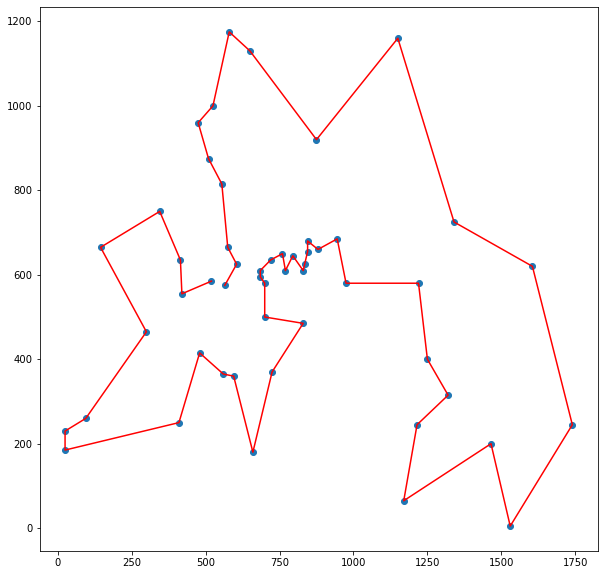

solution score is [7542]


In [11]:
def render_problem(problem, solution, scorepls = False):
    fig, ax = plt.subplots(1, 1, figsize = (10, 10))
    a = [problem.node_coords[node] for node in problem.get_nodes()]
    b = [problem.node_coords[node] for node in solution.tours[0]]
    
    if scorepls:
        return problem.trace_tours(solution.tours)

    ax.scatter([ax[0] for ax in a], [ay[1] for ay in a])
    ax.plot([ax[0] for ax in b], [ay[1] for ay in b], c='red')
    plt.show()
    print(f"solution score is {problem.trace_tours(solution.tours)}")
    
render_problem(problems['berlin52.tsp'], problems['berlin52.opt.tour'])

### Random solutions
this does not need to be fast, nor accurate. We shall use provided solution checker

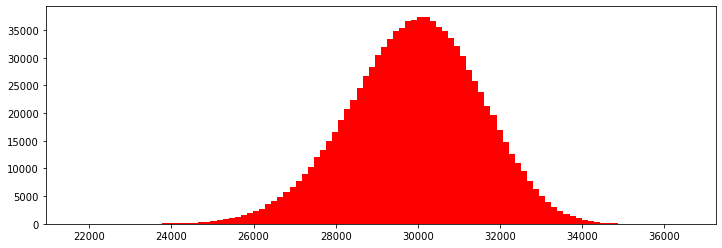

In [17]:
def simulate_random_solutions(problem, solution_, iterations = 1000000):
    problemsize = len(list(problem.get_nodes()))
    fig, ax = plt.subplots(1, 1, figsize = (12, 4))
    scores = []
    for u in tqdm(range(iterations)):
        solution = list(range(1, problemsize + 1))
        random.shuffle(solution)
        score = problem.trace_tours([solution])
        scores.append(score)
        
    npscores = np.array(scores).flatten()
    
    ax.hist(npscores, bins=100, facecolor='red')
    plt.show()
    
simulate_random_solutions(problems['berlin52.tsp'], problems['berlin52.opt.tour'])

## SGA Class

In [ ]:
class SGA:
    def __init__(self):
        pass
